In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from torch.utils.data import Dataset
import scipy.io
import torch
!pwd

sys.path.append('../')
from module.Pingfan_ver2_datamodule import MRIDataModule

/mnt/ssd/jj/Research/cauMedical/lightning_bolts/script


# Check generated T1 T2

## (Saved variable) Our_RNN, Simple, None

In [27]:
exp='SPLIT-97'

x=[]; z=[]; x_hat=[]; z_hat=[]

for i in range(5):
    file_name = '../../output/Split/'+str(exp)+'/test_'+str(i)+'_saved_variables.npz'
    saved = np.load(file_name)
    x.append(saved['x']); z.append(saved['z']); z_hat.append(saved['z_hat'])
    try:
        x_hat.append(saved['x_hat'])
    except:
        x_hat.append(saved['x'])
        
x = np.concatenate(x); x_hat = np.concatenate(x_hat)
z = np.concatenate(z); z_hat = np.concatenate(z_hat)
x.shape

(250, 1000)

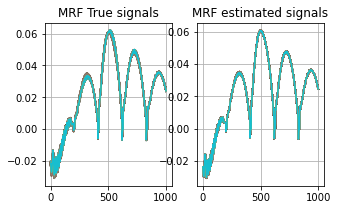

In [28]:
plt.figure(figsize = (5,3) )
plt.subplot(1,2,1)
plt.plot(np.real(x.T))
plt.title('MRF True signals')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.real(x_hat.T))
plt.title('MRF estimated signals')
plt.grid(True)
plt.show()

In [29]:
print('< z_hat / z_true >')
for i in [5, 10, 30, 49]:
    print('-'*20)
    print(i)
    print('-'*20)
    print('T1 : ', z_hat[i][0], z[i][0])
    print('T2 : ', z_hat[i][1], z[i][1])

< z_hat / z_true >
--------------------
5
--------------------
T1 :  3.396 3.3981137
T2 :  3.0 3.0216026
--------------------
10
--------------------
T1 :  3.398 3.3981137
T2 :  3.016 3.0417874
--------------------
30
--------------------
T1 :  3.4 3.3981137
T2 :  3.074 3.1142774
--------------------
49
--------------------
T1 :  3.4 3.3981137
T2 :  3.123 3.1734776


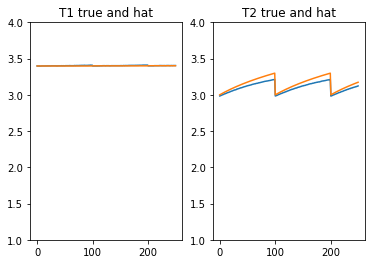

In [30]:
concat_T1 = np.concatenate((z_hat[:,0].reshape(-1,1), z[:,0].reshape(-1,1)),1)
concat_T2 = np.concatenate((z_hat[:,1].reshape(-1,1), z[:,1].reshape(-1,1)),1)

plt.subplot(1,2,1)
plt.plot(concat_T1)
plt.title('T1 true and hat')
plt.ylim(1, 4.0)

plt.subplot(1,2,2)
plt.plot(concat_T2)
plt.title('T2 true and hat')
plt.ylim(1, 4.0)

plt.show()

## (Run here) Our_RNN, Simple, None

In [22]:
# get model
# get datamodule
# get x, x_hat, z, z_hat

In [17]:
from module.Pingfan_ver2_datamodule import MRIDataModule
from argparse import ArgumentParser
import pytorch_lightning as pl
from pytorch_lightning.loggers.neptune import NeptuneLogger
from trainer import LitModel_Test

exp_id = 'SPLIT-97'

model_path = '../../output/Split/'+str(exp_id)+'/last.ckpt'
rand_std_scale = 0.025

ckpt = torch.load(model_path)
args = ckpt['hyper_parameters']
print(args)


# model 
enc_out_dim = 300  # 512,
latent_dim = 2  # T1 and T2,
input_prod_size = 1000  
model = LitModel_Test(
    input_prod_size,
    enc_out_dim,
    latent_dim,
    rec_lambda=args['rec_lambda'],
    decoder_type=args['decoder_type'],
    is_emb_loss=args['is_emb_loss'],
)
model.load_state_dict(ckpt['state_dict'])
model.eval()

# datamodule
data_module = MRIDataModule(
        batch_size=120,
        num_workers=4,
        test_type="seq",
        is_split_range_T1T2=True,
        subsamp=1,
        seq_jump=5,
        is_input_RF=1,
        need_T1T2_logscale=True,
        need_TETR_second=True,
        need_RF_degree=True,
    )

range_=40    
data_module.prepare_data()
data_module.setup()

test_loader = data_module.val_dataloader()
#     batch = next(iter(test_loader))

for i in range(3):
    for batch in test_loader:
        print(batch[1][:, 0, 1:3][0])
        (T1T2, x, T1T2_hat, x_hat) = model.test_step(batch, 1)

# sample_idx=100
# test_set = data_module.testset
# batch = test_set[sample_idx]
# (T1T2, x, T1T2_hat, x_hat) = model.test_step(batch, 1)


{'input_prod_size': 1000, 'enc_out_dim': 300, 'latent_dim': 2, 'rec_lambda': 1.0, 'decoder_type': 'simple_FC', 'is_emb_loss': 1}
tensor([3.3981, 3.0004])
tensor([3.3998, 3.0795])
tensor([3.4016, 3.1464])
tensor([3.4033, 3.2044])
tensor([3.4050, 3.2555])
tensor([3.4084, 3.0004])
tensor([3.4101, 3.0795])
tensor([3.4118, 3.1464])
tensor([3.4135, 3.2044])
tensor([3.4151, 3.2555])
tensor([3.4185, 3.0004])
tensor([3.4201, 3.0795])
tensor([3.4218, 3.1464])
tensor([3.4234, 3.2044])
tensor([3.4250, 3.2555])
tensor([3.4283, 3.0004])
tensor([3.4299, 3.0795])
tensor([3.4315, 3.1464])
tensor([3.4331, 3.2044])
tensor([3.4347, 3.2555])
tensor([3.4379, 3.0004])
tensor([3.4395, 3.0795])
tensor([3.4411, 3.1464])
tensor([3.4426, 3.2044])
tensor([3.4442, 3.2555])
tensor([3.4473, 3.0004])
tensor([3.4489, 3.0795])
tensor([3.4504, 3.1464])
tensor([3.4519, 3.2044])
tensor([3.4535, 3.2555])
tensor([3.4565, 3.0004])
tensor([3.4580, 3.0795])
tensor([3.4595, 3.1464])
tensor([3.4610, 3.2044])
tensor([3.4625, 3.255

tensor([3.6430, 3.0810])
tensor([3.6439, 3.1477])
tensor([3.6449, 3.2055])
tensor([3.6459, 3.2565])
tensor([3.6479, 3.0022])
tensor([3.6488, 3.0810])
tensor([3.6498, 3.1477])
tensor([3.6508, 3.2055])
tensor([3.6518, 3.2565])
tensor([3.6537, 3.0022])
tensor([3.6547, 3.0810])
tensor([3.6556, 3.1477])
tensor([3.6566, 3.2055])
tensor([3.6575, 3.2565])
tensor([3.6594, 3.0022])
tensor([3.6604, 3.0810])
tensor([3.6613, 3.1477])
tensor([3.6623, 3.2055])
tensor([3.6632, 3.2565])
tensor([3.6651, 3.0022])
tensor([3.6660, 3.0810])
tensor([3.6670, 3.1477])
tensor([3.6679, 3.2055])
tensor([3.6689, 3.2565])
tensor([3.6707, 3.0022])
tensor([3.6716, 3.0810])
tensor([3.6726, 3.1477])
tensor([3.6735, 3.2055])
tensor([3.6744, 3.2565])
tensor([3.6762, 3.0022])
tensor([3.6772, 3.0810])
tensor([3.6781, 3.1477])
tensor([3.6790, 3.2055])
tensor([3.6799, 3.2565])
tensor([3.6817, 3.0022])
tensor([3.6826, 3.0810])
tensor([3.6835, 3.1477])
tensor([3.6844, 3.2055])
tensor([3.6853, 3.2565])
tensor([3.6871, 3.0022])


tensor([3.5296, 3.1477])
tensor([3.5308, 3.2055])
tensor([3.5321, 3.2565])
tensor([3.5347, 3.0022])
tensor([3.5359, 3.0810])
tensor([3.5372, 3.1477])
tensor([3.5384, 3.2055])
tensor([3.5397, 3.2565])
tensor([3.5422, 3.0022])
tensor([3.5434, 3.0810])
tensor([3.5447, 3.1477])
tensor([3.5459, 3.2055])
tensor([3.5472, 3.2565])
tensor([3.5496, 3.0022])
tensor([3.5508, 3.0810])
tensor([3.5521, 3.1477])
tensor([3.5533, 3.2055])
tensor([3.5545, 3.2565])
tensor([3.5569, 3.0022])
tensor([3.5581, 3.0810])
tensor([3.5593, 3.1477])
tensor([3.5605, 3.2055])
tensor([3.5617, 3.2565])
tensor([3.5641, 3.0022])
tensor([3.5653, 3.0810])
tensor([3.5664, 3.1477])
tensor([3.5676, 3.2055])
tensor([3.5688, 3.2565])
tensor([3.5711, 3.0022])
tensor([3.5723, 3.0810])
tensor([3.5735, 3.1477])
tensor([3.5746, 3.2055])
tensor([3.5758, 3.2565])
tensor([3.5781, 3.0022])
tensor([3.5792, 3.0810])
tensor([3.5804, 3.1477])
tensor([3.5815, 3.2055])
tensor([3.5826, 3.2565])
tensor([3.5849, 3.0022])
tensor([3.5860, 3.0810])


tensor([3.4878, 3.0810])
tensor([3.4893, 3.1477])
tensor([3.4907, 3.2055])
tensor([3.4921, 3.2565])
tensor([3.4948, 3.0022])
tensor([3.4962, 3.0810])
tensor([3.4976, 3.1477])
tensor([3.4990, 3.2055])
tensor([3.5004, 3.2565])
tensor([3.5031, 3.0022])
tensor([3.5045, 3.0810])
tensor([3.5058, 3.1477])
tensor([3.5072, 3.2055])
tensor([3.5085, 3.2565])
tensor([3.5112, 3.0022])
tensor([3.5126, 3.0810])
tensor([3.5139, 3.1477])
tensor([3.5152, 3.2055])
tensor([3.5165, 3.2565])
tensor([3.5192, 3.0022])
tensor([3.5205, 3.0810])
tensor([3.5218, 3.1477])
tensor([3.5231, 3.2055])
tensor([3.5244, 3.2565])
tensor([3.5270, 3.0022])
tensor([3.5283, 3.0810])
tensor([3.5296, 3.1477])
tensor([3.5308, 3.2055])
tensor([3.5321, 3.2565])
tensor([3.5347, 3.0022])
tensor([3.5359, 3.0810])
tensor([3.5372, 3.1477])
tensor([3.5384, 3.2055])
tensor([3.5397, 3.2565])
tensor([3.5422, 3.0022])
tensor([3.5434, 3.0810])
tensor([3.5447, 3.1477])
tensor([3.5459, 3.2055])
tensor([3.5472, 3.2565])
tensor([3.5496, 3.0022])


In [20]:
for i in range(100):
    for batch in test_loader:
        if i>98:
            print(batch[1][:, 0, 1:3][0])

tensor([3.3981, 3.0004])
tensor([3.3998, 3.0795])
tensor([3.4016, 3.1464])
tensor([3.4033, 3.2044])
tensor([3.4050, 3.2555])
tensor([3.4084, 3.0004])
tensor([3.4101, 3.0795])
tensor([3.4118, 3.1464])
tensor([3.4135, 3.2044])
tensor([3.4151, 3.2555])
tensor([3.4185, 3.0004])
tensor([3.4201, 3.0795])
tensor([3.4218, 3.1464])
tensor([3.4234, 3.2044])
tensor([3.4250, 3.2555])
tensor([3.4283, 3.0004])
tensor([3.4299, 3.0795])
tensor([3.4315, 3.1464])
tensor([3.4331, 3.2044])
tensor([3.4347, 3.2555])
tensor([3.4379, 3.0004])
tensor([3.4395, 3.0795])
tensor([3.4411, 3.1464])
tensor([3.4426, 3.2044])
tensor([3.4442, 3.2555])
tensor([3.4473, 3.0004])
tensor([3.4489, 3.0795])
tensor([3.4504, 3.1464])
tensor([3.4519, 3.2044])
tensor([3.4535, 3.2555])
tensor([3.4565, 3.0004])
tensor([3.4580, 3.0795])
tensor([3.4595, 3.1464])
tensor([3.4610, 3.2044])
tensor([3.4625, 3.2555])
tensor([3.4655, 3.0004])
tensor([3.4670, 3.0795])
tensor([3.4685, 3.1464])
tensor([3.4700, 3.2044])
tensor([3.4714, 3.2555])


tensor([3.6439, 3.1477])
tensor([3.6449, 3.2055])
tensor([3.6459, 3.2565])
tensor([3.6479, 3.0022])
tensor([3.6488, 3.0810])
tensor([3.6498, 3.1477])
tensor([3.6508, 3.2055])
tensor([3.6518, 3.2565])
tensor([3.6537, 3.0022])
tensor([3.6547, 3.0810])
tensor([3.6556, 3.1477])
tensor([3.6566, 3.2055])
tensor([3.6575, 3.2565])
tensor([3.6594, 3.0022])
tensor([3.6604, 3.0810])
tensor([3.6613, 3.1477])
tensor([3.6623, 3.2055])
tensor([3.6632, 3.2565])
tensor([3.6651, 3.0022])
tensor([3.6660, 3.0810])
tensor([3.6670, 3.1477])
tensor([3.6679, 3.2055])
tensor([3.6689, 3.2565])
tensor([3.6707, 3.0022])
tensor([3.6716, 3.0810])
tensor([3.6726, 3.1477])
tensor([3.6735, 3.2055])
tensor([3.6744, 3.2565])
tensor([3.6762, 3.0022])
tensor([3.6772, 3.0810])
tensor([3.6781, 3.1477])
tensor([3.6790, 3.2055])
tensor([3.6799, 3.2565])
tensor([3.6817, 3.0022])
tensor([3.6826, 3.0810])
tensor([3.6835, 3.1477])
tensor([3.6844, 3.2055])
tensor([3.6853, 3.2565])
tensor([3.6871, 3.0022])
tensor([3.6880, 3.0810])


# Dataset

In [49]:
class PingSeqDataset_seperate(Dataset):
    def __init__(self, mode='train'):
        if mode == 'train':
            MRFData = scipy.io.loadmat('/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/D_LUT_L1000_TE10_Start1_Train.mat')
        else:
            MRFData = scipy.io.loadmat('/mnt/ssd/jj/Research/cauMedical/lightning_bolts/Bloch_decoder/data/Pingfan/D_LUT_L1000_TE10_Start5_Val.mat')
        self.D = torch.from_numpy(np.real(MRFData['D'][:,1::5]))
        self.D = torch.nn.functional.normalize(self.D, p=2.0, dim=1)
        self.labels = torch.from_numpy(MRFData['LUT']) 

    def __len__(self):
        return len(self.D)

    def __getitem__(self, idx):
        return self.D[idx], self.labels[idx]

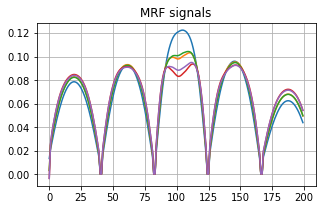

In [50]:
data = PingSeqDataset_seperate(mode='test')
x = data.D[:5]
z = data.labels[:5]

# show simulated MRI signals for specified points (indexed by T1, T2, PD values)
plt.figure(figsize = (5,3) )
plt.plot(np.real(x.T))
# plt.axis('off') 
plt.title('MRF signals')
plt.grid(True)
plt.show()

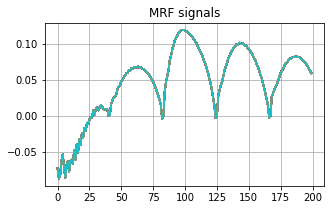

In [20]:
import matplotlib.pyplot as plt
# show simulated MRI signals for specified points (indexed by T1, T2, PD values)
plt.figure(figsize = (5,3) )
plt.plot(np.real(x_hat.T))
# plt.axis('off') 
plt.title('MRF signals')
plt.grid(True)
plt.show()